In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
%matplotlib notebook

In [10]:
student_mat = pd.read_csv("student-mat.csv", sep = ";")
student_por = pd.read_csv("student-por.csv", sep = ";")
students = pd.concat([student_mat, student_por])
students['alc'] = students['Walc'] + students['Dalc']
students = students.drop(['Walc','Dalc'],1)
y = pd.DataFrame(students['alc'])
X = pd.DataFrame(students.drop(['alc'],1))
X = pd.get_dummies(X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# Для наглядности представления дерева, ограничим его глубину 5 слоями. 
# Увеличив глубину дерева, мы можем добиться лучшей точности классификации.
# Чрезмерная точность однако может привести к переобучению.

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
 
clf_tree.fit(X, y)
print(clf_tree.score(X, y))

#clf_tree.fit(X_train, y_train)
#print(clf_tree.score(X_test,y_test))

0.471264367816


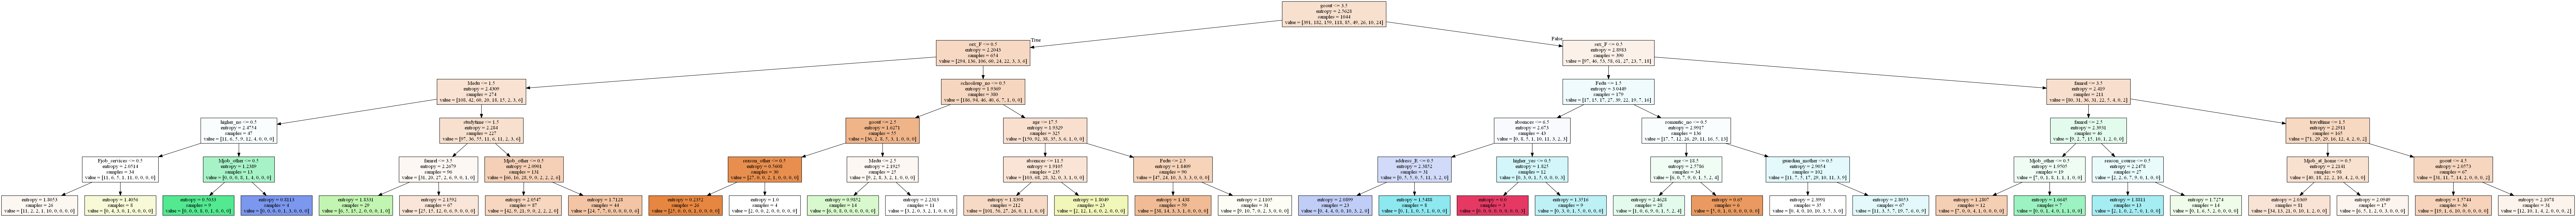

In [12]:
'''
Построим графическое изображение полученного решающего дерева.
Последовательность делений по признакам отражает их значимость.
Чем ближе признак к корню дерева, тем больше информации несёт деление выборки по данному признаку.
В нашей задаче наиболее различное поведение в потреблении алкоголя 
характеризуются различием в следующих признаках (в порядке значимости): 

1 - goout - частота встреч и прогулок с друзьями
2 - sex - пол ученика
3 - famrel - качество взаимоотношений в семье
4 - schoolsup - наличие допольнительной поддержке в школе (например, при переводе в новую школу)
5 - Medu - образование матери
6 - Fedu - образование отца
...

Оценив деление решающего дерева, можно выделить следующие основные группы студентов, 
характеризующие наиболее различное поведение в потреблении алкоголя:

1 - любители погулять (тусовщики), девочки из неблагополучных семей (более склонны к потреблению алкоголя)
2 - любители погулять (тусовщики), девочки из благополучных семей (менее склонны к потреблению алкоголя)
3 - любители погулять (тусовщики), мальчики, отцы которых не закончили школу (более склонны к потреблению алкоголя)
4 - любители погулять (тусовщики), мальчики, отцы которых закончили школу и возможно продолжили образование (менее склонны к потреблению алкоголя)
5 - редко гуляющие (домоседы), девочки, не имеющие дополнительную поддержку в школе (более склонны к потреблению алкоголя)
6 - редко гуляющие (домоседы), девочки, имеющие дополнительную поддержку в школе (менее склонны к потреблению алкоголя)
7 - редко гуляющие (домоседы), мальчики, матери которых не закончили школу (более склонны к потреблению алкоголя)
8 - редко гуляющие (домоседы), мальчики, матери которых закончили школу и возможно продолжили образование (менее склонны к потреблению алкоголя)
...

'''

export_graphviz(clf_tree, feature_names=X.columns.values, 
                out_file='tree.dot', filled=True)

import pydot
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

from IPython.core.display import Image, display
display(Image('tree.png', unconfined=True))